In [1]:
from sklearn.datasets import make_classification
import numpy as np
X, y = make_classification(n_samples=100, n_features=2, n_informative=1,n_redundant=0,
                           n_classes=2, n_clusters_per_class=1, random_state=41,hypercube=False,class_sep=20)

array([-0.11697552, -0.73115232, -0.7081059 , -2.01199214,  1.63493163,
        0.15599044,  1.07782053,  0.80626713,  0.74859527,  0.75152794,
       -0.90114581, -0.1815243 , -2.98092432,  1.20500136,  0.78302407,
        0.42968688, -0.73229726, -0.83930476,  0.83727062, -0.10255323,
        0.65867001,  0.92649819,  0.10216193,  0.46886454,  0.45432938,
        1.8613386 , -0.79255991, -1.0004391 , -0.53814137,  0.44027716,
        0.27047889, -0.75869267,  0.6802322 ,  0.17018845, -1.01121977,
       -0.8394709 ,  0.90327412,  1.16981747,  0.53461406, -0.22100631,
       -0.64584571,  0.21243302,  0.98654083,  0.67382928, -0.11323563,
        0.91694693,  0.3645213 , -0.78470874, -1.48004137,  0.72931763,
       -0.60000139,  0.14720034,  0.35215601,  0.17388705, -0.17162755,
        0.03763193,  0.48360467, -0.07909256,  0.06158897, -1.20413846,
        0.77324391,  0.7640092 ,  1.57200032,  0.47296516,  0.0642074 ,
        1.52469135, -2.1450828 , -0.7701428 ,  0.84455766,  1.29

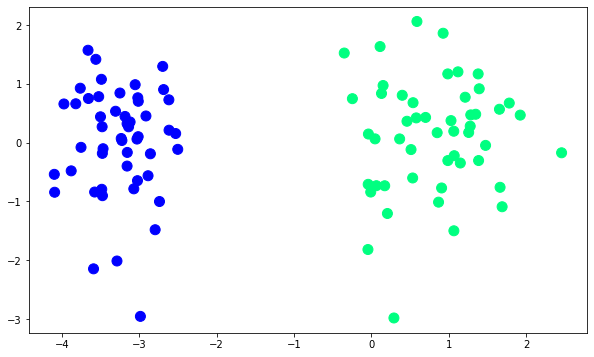

In [6]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)

In [3]:
from sklearn.linear_model import LogisticRegression

In [4]:
lor = LogisticRegression(penalty='none', solver='sag')

In [6]:
lor.fit(X, y)

C:\Users\Hunani Trading Co\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(penalty='none', solver='sag')

In [7]:
lor.coef_

array([[4.80286333, 0.21369894]])

In [8]:
lor.intercept_

array([5.7709351])

In [10]:
m1 = -(lor.coef_[0][0]/ lor.coef_[0][1])
b1 = -(lor.intercept_/ lor.coef_[0][1])

In [11]:
x_input = np.linspace(-3, 3, 100)
y_input = m1 * x_input + b1

In [12]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

In [21]:
def GD(X, y):
    X = np.insert(X, 0, 1, axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.5
    
    for i in range(5000):
        y_hat = sigmoid(np.dot(X, weights))
        weights = weights + (lr * np.dot((y - y_hat),X)/X.shape[0])
        
    return weights[0], weights[1:]    


In [22]:
intercept_, coef_ = GD(X, y)

In [23]:
print(intercept_)
print(coef_)

5.833388649053249
[4.83926872 0.21182255]


In [24]:
m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])

In [25]:
x_input1 = np.linspace(-3,3,100)
y_input1 = m*x_input1 + b

(-3.0, 2.0)

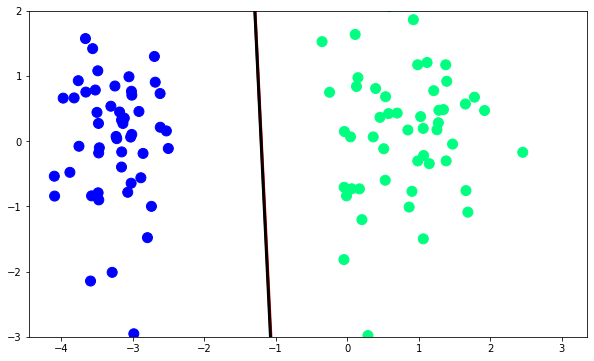

In [26]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.plot(x_input1,y_input1,color='black',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)